# Data Visualization Lab - Sebastiano Cassol - id: 229318
> 14 - 02 - 2022

## Exercise 1
(...)

## Exercise 2
(...)

## Exercise 3
(...)

## Exercise 4
### Worldwide Crop Consumption

In [1]:
import pandas as pd

crop_consumption = pd.read_csv('../worldwide_crop_consumption.csv')

crop_consumption

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,1990,5.374114
1,AUS,RICE,TONNE_HA,1991,5.897753
2,AUS,RICE,TONNE_HA,1992,5.903150
3,AUS,RICE,TONNE_HA,1993,5.221311
4,AUS,RICE,TONNE_HA,1994,5.457576
...,...,...,...,...,...
21160,EU28,SOYBEAN,TONNE_HA,2022,2.897405
21161,EU28,SOYBEAN,TONNE_HA,2023,2.903548
21162,EU28,SOYBEAN,TONNE_HA,2024,2.915203
21163,EU28,SOYBEAN,TONNE_HA,2025,2.919959


For the first infographic, we want to visualize the 'RICE' consumption in a certain country over the years. So let's pick a country and prepare the data.
Let's say *Japan*.

In [2]:
crop_japan = crop_consumption[crop_consumption['LOCATION'] == 'JPN']

rice_japan = crop_japan[crop_japan['SUBJECT'] == 'RICE']

rice_japan.reset_index(inplace=True) # create index

rice_japan = rice_japan.iloc[:, 1:] # remove old indexes

rice_japan

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,JPN,RICE,TONNE_HA,1990,4.586352
1,JPN,RICE,TONNE_HA,1991,4.246571
2,JPN,RICE,TONNE_HA,1992,4.548499
3,JPN,RICE,TONNE_HA,1993,3.318188
4,JPN,RICE,TONNE_HA,1994,4.907227
...,...,...,...,...,...
106,JPN,RICE,THND_TONNE,2022,7723.508796
107,JPN,RICE,THND_TONNE,2023,7704.151491
108,JPN,RICE,THND_TONNE,2024,7684.502013
109,JPN,RICE,THND_TONNE,2025,7664.479836


In [12]:
soybean_japan = crop_japan[crop_japan['SUBJECT'] == 'SOYBEAN']

soybean_japan.reset_index(inplace=True, drop=True) # create index

soybean_japan

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,JPN,SOYBEAN,TONNE_HA,1990,1.507882
1,JPN,SOYBEAN,TONNE_HA,1991,1.399148
2,JPN,SOYBEAN,TONNE_HA,1992,1.710646
3,JPN,SOYBEAN,TONNE_HA,1993,1.155606
4,JPN,SOYBEAN,TONNE_HA,1994,1.625616
...,...,...,...,...,...
106,JPN,SOYBEAN,THND_HA,2022,133.779509
107,JPN,SOYBEAN,THND_HA,2023,132.569564
108,JPN,SOYBEAN,THND_HA,2024,131.437351
109,JPN,SOYBEAN,THND_HA,2025,130.242328


Now it's time to prepare the data for the bar plot.

In [14]:
rice_japan_tonneha = rice_japan[rice_japan['MEASURE'] == 'TONNE_HA']

rice_japan_tonneha['TIME'] = pd.to_numeric(rice_japan_tonneha['TIME'])

rice_japan_tonneha['Value'] = pd.to_numeric(rice_japan_tonneha['Value'])

# drop years: 2024, 2025, 2026
rice_japan_tonneha = rice_japan_tonneha[rice_japan['TIME'] != 2024]
rice_japan_tonneha = rice_japan_tonneha[rice_japan['TIME'] != 2025]
rice_japan_tonneha = rice_japan_tonneha[rice_japan['TIME'] != 2026]

years = rice_japan_tonneha['TIME'].tolist()

rice_japan_tonneha

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1746002619.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1746002619.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1746002619.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1746002619.py:9: UserWarning:

Bool

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,JPN,RICE,TONNE_HA,1990,4.586352
1,JPN,RICE,TONNE_HA,1991,4.246571
2,JPN,RICE,TONNE_HA,1992,4.548499
3,JPN,RICE,TONNE_HA,1993,3.318188
4,JPN,RICE,TONNE_HA,1994,4.907227
5,JPN,RICE,TONNE_HA,1995,4.597586
6,JPN,RICE,TONNE_HA,1996,4.740346
7,JPN,RICE,TONNE_HA,1997,4.650614
8,JPN,RICE,TONNE_HA,1998,4.507363
9,JPN,RICE,TONNE_HA,1999,4.649077


In [13]:
soybean_japan_tonneha = soybean_japan[soybean_japan['MEASURE'] == 'TONNE_HA']

soybean_japan_tonneha['TIME'] = pd.to_numeric(soybean_japan_tonneha['TIME'])

soybean_japan_tonneha['Value'] = pd.to_numeric(soybean_japan_tonneha['Value'])

# drop years: 2024, 2025, 2026
soybean_japan_tonneha = soybean_japan_tonneha[soybean_japan['TIME'] != 2024]
soybean_japan_tonneha = soybean_japan_tonneha[soybean_japan['TIME'] != 2025]
soybean_japan_tonneha = soybean_japan_tonneha[soybean_japan['TIME'] != 2026]

soybean_japan_tonneha

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1504846187.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1504846187.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1504846187.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/1504846187.py:9: UserWarning:

Bool

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,JPN,SOYBEAN,TONNE_HA,1990,1.507882
1,JPN,SOYBEAN,TONNE_HA,1991,1.399148
2,JPN,SOYBEAN,TONNE_HA,1992,1.710646
3,JPN,SOYBEAN,TONNE_HA,1993,1.155606
4,JPN,SOYBEAN,TONNE_HA,1994,1.625616
5,JPN,SOYBEAN,TONNE_HA,1995,1.734694
6,JPN,SOYBEAN,TONNE_HA,1996,1.809291
7,JPN,SOYBEAN,TONNE_HA,1997,1.742788
8,JPN,SOYBEAN,TONNE_HA,1998,1.448213
9,JPN,SOYBEAN,TONNE_HA,1999,1.730129


Now let's prepare the data to visualize the entire world consumption of `RICE` in a certain year e.g., 2022, on a map.

In [4]:
world_consumption_2022 = crop_consumption[crop_consumption['TIME'] == 2022]

world_consumption_2022 = world_consumption_2022[world_consumption_2022['SUBJECT'] == 'RICE']
world_consumption_2022 = world_consumption_2022[world_consumption_2022['MEASURE'] == 'TONNE_HA']

world_consumption_2022.reset_index(inplace=True)

world_consumption_2022 = world_consumption_2022.iloc[:, 1:]

min_value = min(world_consumption_2022['Value'])
max_value = max(world_consumption_2022['Value'])
min_year = min(world_consumption_2022['TIME'])
max_year = max(world_consumption_2022['TIME'])

world_consumption_2022

,LOCATION,SUBJECT,MEASURE,TIME,Value
0,AUS,RICE,TONNE_HA,2022,7.136389
1,CAN,RICE,TONNE_HA,2022,0.000000
2,JPN,RICE,TONNE_HA,2022,5.391693
3,KOR,RICE,TONNE_HA,2022,5.478479
4,MEX,RICE,TONNE_HA,2022,4.122439
5,TUR,RICE,TONNE_HA,2022,4.962378
6,USA,RICE,TONNE_HA,2022,5.988993
7,DZA,RICE,TONNE_HA,2022,0.793009
8,ARG,RICE,TONNE_HA,2022,4.797549
9,BGD,RICE,TONNE_HA,2022,3.375660


Now we have to deal with geodata.

In [5]:
import json
with open('countries.geo.json') as f:
    worldmap = json.load(f)
    
worldmap

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'scalerank': 1,
    'featurecla': 'Admin-0 country',
    'labelrank': 4,
    'sovereignt': 'Central African Republic',
    'sov_a3': 'CAF',
    'adm0_dif': 0,
    'level': 2,
    'type': 'Sovereign country',
    'admin': 'Central African Republic',
    'adm0_a3': 'CAF',
    'geou_dif': 0,
    'geounit': 'Central African Republic',
    'gu_a3': 'CAF',
    'su_dif': 0,
    'subunit': 'Central African Republic',
    'su_a3': 'CAF',
    'brk_diff': 0,
    'name': 'Central African Rep.',
    'name_long': 'Central African Republic',
    'brk_a3': 'CAF',
    'brk_name': 'Central African Rep.',
    'brk_group': None,
    'abbrev': 'C.A.R.',
    'postal': 'CF',
    'formal_en': 'Central African Republic',
    'formal_fr': None,
    'note_adm0': None,
    'note_brk': None,
    'name_sort': 'Central African Republic',
    'name_alt': None,
    'mapcolor7': 5,
    'mapcolor8': 6,
    'mapcolor9': 6,
    'mapcolor13':

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/3067057114.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


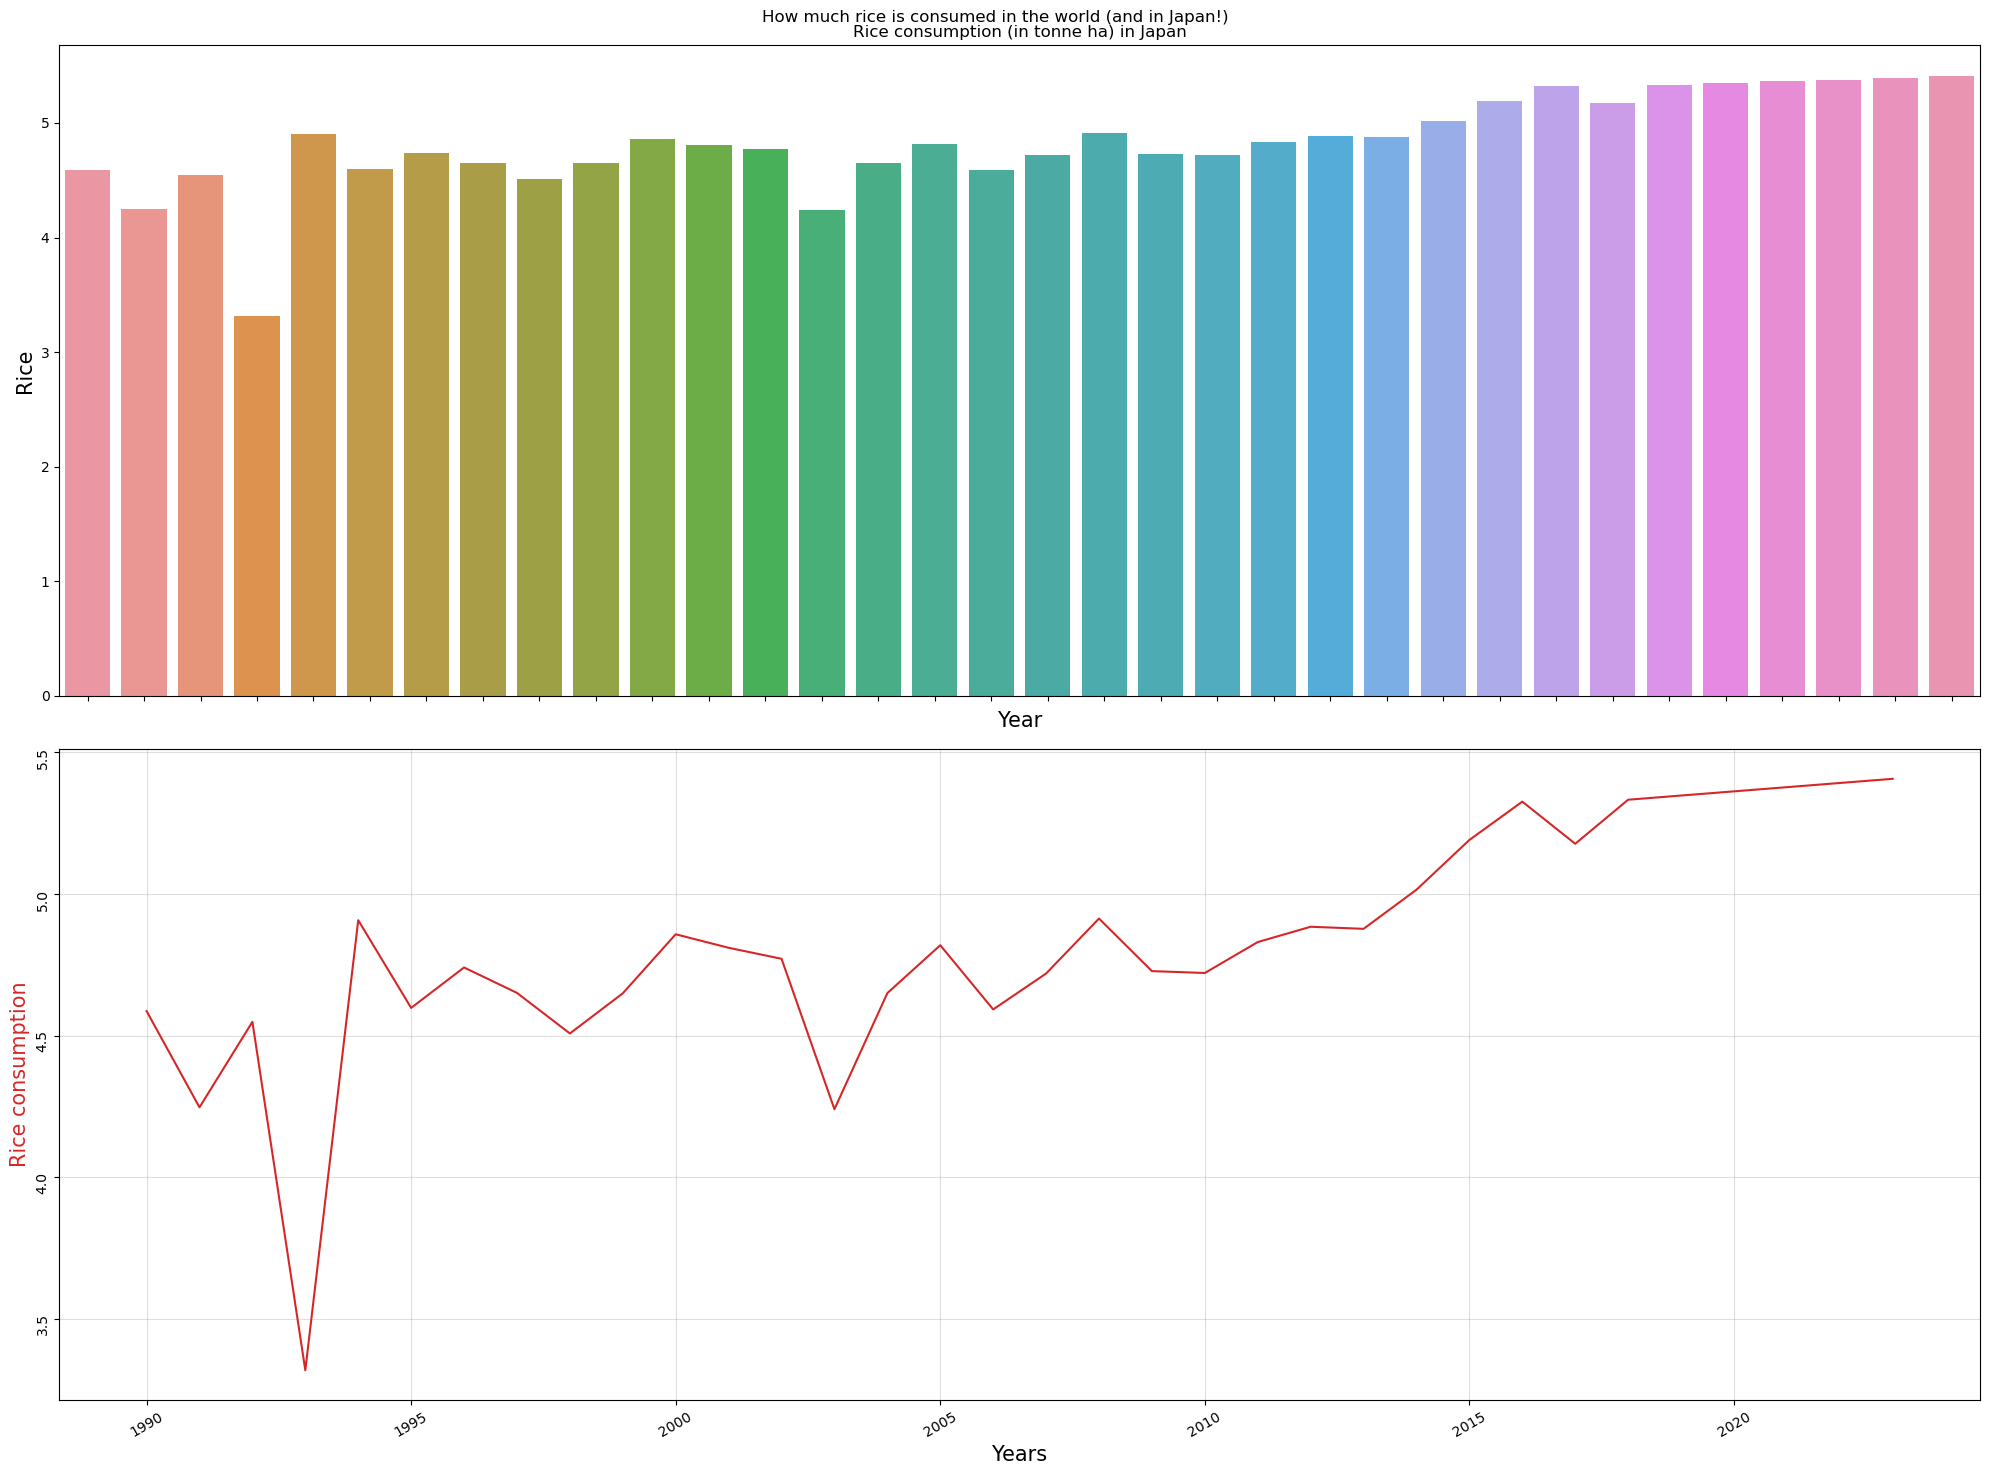

In [6]:
import numpy as np
import seaborn as sns
import mapclassify as mc
import matplotlib.pyplot as plt
import plotly.express as px

# statistical figure

fig, axes = plt.subplots(2, 1, figsize=(20, 15)) # define two subplots

plt.suptitle('How much rice is consumed in the world (and in Japan!)')

sns.barplot(ax = axes[0], data=rice_japan_tonneha, x='TIME', y="Value")
axes[0].set_title("Rice consumption (in tonne ha) in Japan")
axes[0].set_xlabel("Year", fontsize = 15)
axes[0].set_xticks(np.arange(0, len(years), 1))
axes[0].set_xticklabels(np.arange(min_year, max_year, 1), rotation=70, fontsize=15)
axes[0].set_ylabel("Rice", fontsize=15)

axes[1].plot(rice_japan_tonneha['TIME'], rice_japan_tonneha['Value'], color='tab:red')
axes[1].set_xlabel("Years", fontsize=15)
axes[1].tick_params(axis="x", rotation=30, labelsize=10)
axes[1].set_ylabel("Rice consumption", color="tab:red", fontsize=15)
axes[1].tick_params(axis="y", rotation=90, labelsize=10)
axes[1].grid(alpha=.4)

fig.tight_layout()

fig.show()

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/3505335940.py:18: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



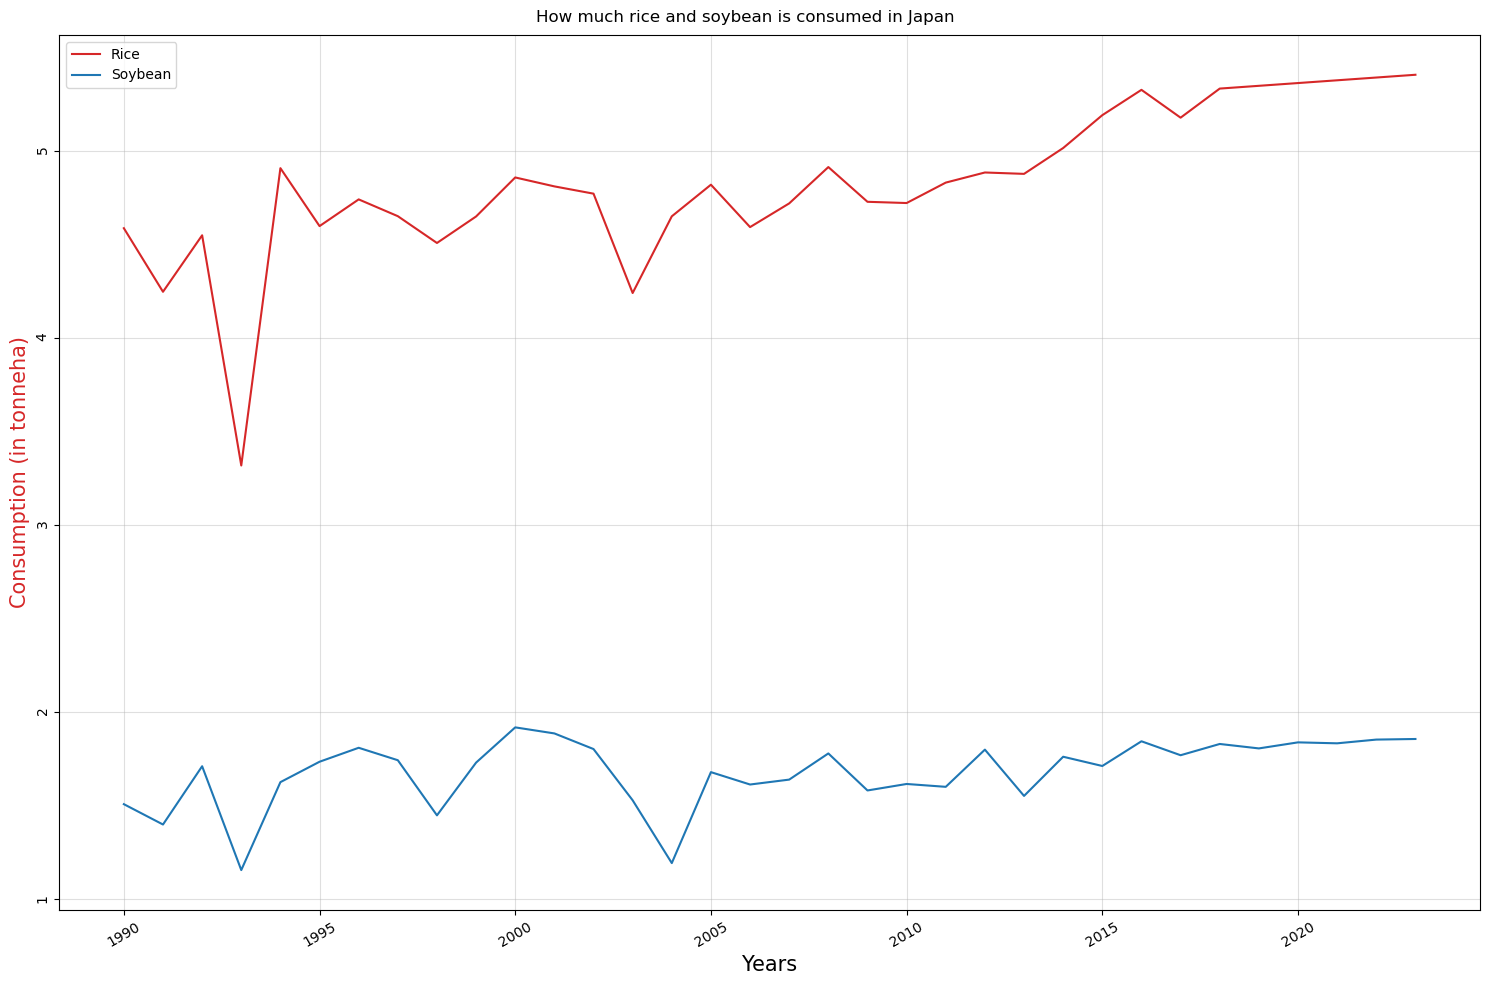

In [32]:
# let's try a different plot using both rice and soybean for japan

fig = plt.figure(figsize=(15, 10))

plt.suptitle('How much rice and soybean is consumed in Japan')

plt.plot(rice_japan_tonneha['TIME'], rice_japan_tonneha['Value'], color='tab:red')
plt.plot(soybean_japan_tonneha['TIME'], soybean_japan_tonneha['Value'], color='tab:blue')
plt.xlabel("Years", fontsize=15)
plt.tick_params(axis="x", rotation=30, labelsize=10)
plt.ylabel("Consumption (in tonneha)", color="tab:red", fontsize=15)
plt.tick_params(axis="y", rotation=90, labelsize=10)
plt.grid(alpha=.4)
plt.legend(['Rice', 'Soybean'], loc='upper left')


fig.tight_layout()
fig.show()





In [7]:
# choropleth map
fig2 = px.choropleth_mapbox(world_consumption_2022,
                            geojson=worldmap,
                            locations='LOCATION',
                            featureidkey='properties.sov_a3',
                            color='Value',
                            color_continuous_scale="Viridis",
                            range_color=(min_value, max_value),
                            labels={'Country':'LOCATION', 'Consumption':'Value'},
                            title="World rice consumption in 2022",
                            hover_data=['LOCATION', 'Value'],
                            center={'lon': 14, 'lat': 40},
                            mapbox_style='open-street-map',
                            zoom=2)

fig2.update_geos(showcountries=False,
                 showcoastlines=False,
                 showland=False,
                 fitbounds='locations')
fig2.update_layout(margin={"r":0, "t":40, "l":0, "b":0})
fig2.show()

## Exercise 5
Dimensionality reduction

In [87]:
import pandas as pd

setlur = pd.read_csv('../setlur.csv', sep='	')

transposed_setlur = setlur.T

transposed_setlur

,0,1,2,3,4,5,6,7,8,9,...,6135,6136,6137,6138,6139,6140,6141,6142,6143,6144
ID_REF,DAP1_0003,DAP1_0010,DAP1_0021,DAP1_0023,DAP1_0027,DAP1_0028,DAP1_0030,DAP1_0031,DAP1_0033,DAP1_0036,...,DAP4_6124,DAP4_6125,DAP4_6126,DAP4_6130,DAP4_6131,DAP4_6136,DAP4_6137,DAP4_6139,DAP4_6140,Label
GSM208029,0.3345,1.0303,-0.5064,-0.908,-0.075,-1.4692,0.6375,1.4085,-1.2684,-0.8056,...,0.6656,-0.0163,0.6612,-1.3399,-0.7421,-1.2247,-1.6588,-0.0577,-0.7804,0.0
GSM208030,0.6069,0.943,-1.6348,-0.8009,-1.0046,-1.5045,0.0277,1.1994,-0.2862,-0.5377,...,0.2229,-0.4467,0.6325,-0.8783,-0.5958,-0.6982,-1.3777,-0.0944,-0.9004,0.0
GSM208031,0.301,0.7099,-0.0681,-1.1663,-1.5153,-0.8546,0.8023,1.497,-0.469,-0.9407,...,0.5702,0.6811,0.5237,-1.2545,-0.8591,-1.2102,-0.4847,0.224,-1.2088,1.0
GSM208032,-0.2263,0.4391,-1.584,-0.5828,-0.6521,-1.7212,0.2352,1.5541,-0.2129,-0.6419,...,0.4077,0.3896,0.8858,-0.4327,-0.0219,-0.589,-1.747,0.9714,0.9159,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM208508,0.724959,0.01976,-1.120169,-0.412067,-0.930513,-1.452186,0.498551,1.367941,0.379539,-1.160174,...,0.463775,0.468411,-0.206063,-0.648982,-0.218395,-0.530877,-1.481883,0.992172,0.518038,1.0
GSM208509,-0.234773,-0.838828,-1.249909,0.168624,-0.726685,-1.501685,0.596497,1.442094,-0.252302,-1.217572,...,1.219585,-0.287149,0.767391,-0.309154,-1.575836,-0.14079,-1.464908,-1.395414,-0.443806,0.0
GSM208510,0.399146,1.044011,-0.125068,-1.012975,0.32714,-1.17804,0.731575,0.955032,-1.26206,-0.513835,...,0.816787,-0.12254,-0.003305,0.966235,-1.168689,0.25756,-1.614672,0.509635,-1.155172,-1.0
GSM208511,1.168442,0.81899,-0.805904,-0.422129,0.421002,-1.185805,0.588212,1.428937,-0.285618,-1.602737,...,0.295825,0.439213,1.003567,-0.392284,-1.506775,-0.338487,-1.537845,1.235901,0.382928,0.0


In [88]:
# prepare data for PCA and TSNE

transposed_setlur = transposed_setlur.iloc[1:, :]

transposed_setlur.reset_index(inplace=True)

for i in range(len(transposed_setlur)):
    code = int(transposed_setlur['index'][i][6:10])
    if 29 <= code <= 329:
        transposed_setlur['index'][i] = 'Swedish'
    else:
        transposed_setlur['index'][i] = 'USA'

transposed_setlur

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/2883607505.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/2883607505.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,0,1,2,3,4,5,6,7,8,...,6135,6136,6137,6138,6139,6140,6141,6142,6143,6144
0,Swedish,0.3345,1.0303,-0.5064,-0.908,-0.075,-1.4692,0.6375,1.4085,-1.2684,...,0.6656,-0.0163,0.6612,-1.3399,-0.7421,-1.2247,-1.6588,-0.0577,-0.7804,0.0
1,Swedish,0.6069,0.943,-1.6348,-0.8009,-1.0046,-1.5045,0.0277,1.1994,-0.2862,...,0.2229,-0.4467,0.6325,-0.8783,-0.5958,-0.6982,-1.3777,-0.0944,-0.9004,0.0
2,Swedish,0.301,0.7099,-0.0681,-1.1663,-1.5153,-0.8546,0.8023,1.497,-0.469,...,0.5702,0.6811,0.5237,-1.2545,-0.8591,-1.2102,-0.4847,0.224,-1.2088,1.0
3,Swedish,-0.2263,0.4391,-1.584,-0.5828,-0.6521,-1.7212,0.2352,1.5541,-0.2129,...,0.4077,0.3896,0.8858,-0.4327,-0.0219,-0.589,-1.747,0.9714,0.9159,0.0
4,Swedish,-0.0335,0.7185,-1.4253,-0.9243,0.1017,-0.8109,0.681,1.4807,-0.9594,...,0.1852,-0.5558,1.0192,-0.8031,-0.8829,0.1166,-0.0785,0.1065,-1.0202,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,USA,0.724959,0.01976,-1.120169,-0.412067,-0.930513,-1.452186,0.498551,1.367941,0.379539,...,0.463775,0.468411,-0.206063,-0.648982,-0.218395,-0.530877,-1.481883,0.992172,0.518038,1.0
468,USA,-0.234773,-0.838828,-1.249909,0.168624,-0.726685,-1.501685,0.596497,1.442094,-0.252302,...,1.219585,-0.287149,0.767391,-0.309154,-1.575836,-0.14079,-1.464908,-1.395414,-0.443806,0.0
469,USA,0.399146,1.044011,-0.125068,-1.012975,0.32714,-1.17804,0.731575,0.955032,-1.26206,...,0.816787,-0.12254,-0.003305,0.966235,-1.168689,0.25756,-1.614672,0.509635,-1.155172,-1.0
470,USA,1.168442,0.81899,-0.805904,-0.422129,0.421002,-1.185805,0.588212,1.428937,-0.285618,...,0.295825,0.439213,1.003567,-0.392284,-1.506775,-0.338487,-1.537845,1.235901,0.382928,0.0


In [89]:
# convert '6144' column to string
transposed_setlur[6144] = transposed_setlur[6144].astype(str)

transposed_setlur[6144]

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/516537371.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       0.0
1       0.0
2       1.0
3       0.0
4      -1.0
       ... 
467     1.0
468     0.0
469    -1.0
470     0.0
471     0.0
Name: 6144, Length: 472, dtype: object

In [91]:
# prepare color hue 

transposed_setlur['category'] = transposed_setlur['index'] + ' ' + transposed_setlur[6144]

transposed_setlur.head()

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/227918657.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,index,0,1,2,3,4,5,6,7,8,...,6136,6137,6138,6139,6140,6141,6142,6143,6144,category
0,Swedish,0.3345,1.0303,-0.5064,-0.908,-0.075,-1.4692,0.6375,1.4085,-1.2684,...,-0.0163,0.6612,-1.3399,-0.7421,-1.2247,-1.6588,-0.0577,-0.7804,0.0,Swedish 0.0
1,Swedish,0.6069,0.943,-1.6348,-0.8009,-1.0046,-1.5045,0.0277,1.1994,-0.2862,...,-0.4467,0.6325,-0.8783,-0.5958,-0.6982,-1.3777,-0.0944,-0.9004,0.0,Swedish 0.0
2,Swedish,0.301,0.7099,-0.0681,-1.1663,-1.5153,-0.8546,0.8023,1.497,-0.469,...,0.6811,0.5237,-1.2545,-0.8591,-1.2102,-0.4847,0.224,-1.2088,1.0,Swedish 1.0
3,Swedish,-0.2263,0.4391,-1.584,-0.5828,-0.6521,-1.7212,0.2352,1.5541,-0.2129,...,0.3896,0.8858,-0.4327,-0.0219,-0.589,-1.747,0.9714,0.9159,0.0,Swedish 0.0
4,Swedish,-0.0335,0.7185,-1.4253,-0.9243,0.1017,-0.8109,0.681,1.4807,-0.9594,...,-0.5558,1.0192,-0.8031,-0.8829,0.1166,-0.0785,0.1065,-1.0202,-1.0,Swedish -1.0


In [94]:
# prepare fit data

fit_data = transposed_setlur.iloc[:, 1:-2]

fit_data

,0,1,2,3,4,5,6,7,8,9,...,6134,6135,6136,6137,6138,6139,6140,6141,6142,6143
0,0.3345,1.0303,-0.5064,-0.908,-0.075,-1.4692,0.6375,1.4085,-1.2684,-0.8056,...,0.5083,0.6656,-0.0163,0.6612,-1.3399,-0.7421,-1.2247,-1.6588,-0.0577,-0.7804
1,0.6069,0.943,-1.6348,-0.8009,-1.0046,-1.5045,0.0277,1.1994,-0.2862,-0.5377,...,0.51,0.2229,-0.4467,0.6325,-0.8783,-0.5958,-0.6982,-1.3777,-0.0944,-0.9004
2,0.301,0.7099,-0.0681,-1.1663,-1.5153,-0.8546,0.8023,1.497,-0.469,-0.9407,...,0.7442,0.5702,0.6811,0.5237,-1.2545,-0.8591,-1.2102,-0.4847,0.224,-1.2088
3,-0.2263,0.4391,-1.584,-0.5828,-0.6521,-1.7212,0.2352,1.5541,-0.2129,-0.6419,...,1.3442,0.4077,0.3896,0.8858,-0.4327,-0.0219,-0.589,-1.747,0.9714,0.9159
4,-0.0335,0.7185,-1.4253,-0.9243,0.1017,-0.8109,0.681,1.4807,-0.9594,-1.1162,...,-0.4413,0.1852,-0.5558,1.0192,-0.8031,-0.8829,0.1166,-0.0785,0.1065,-1.0202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.724959,0.01976,-1.120169,-0.412067,-0.930513,-1.452186,0.498551,1.367941,0.379539,-1.160174,...,1.374689,0.463775,0.468411,-0.206063,-0.648982,-0.218395,-0.530877,-1.481883,0.992172,0.518038
468,-0.234773,-0.838828,-1.249909,0.168624,-0.726685,-1.501685,0.596497,1.442094,-0.252302,-1.217572,...,0.661666,1.219585,-0.287149,0.767391,-0.309154,-1.575836,-0.14079,-1.464908,-1.395414,-0.443806
469,0.399146,1.044011,-0.125068,-1.012975,0.32714,-1.17804,0.731575,0.955032,-1.26206,-0.513835,...,0.259402,0.816787,-0.12254,-0.003305,0.966235,-1.168689,0.25756,-1.614672,0.509635,-1.155172
470,1.168442,0.81899,-0.805904,-0.422129,0.421002,-1.185805,0.588212,1.428937,-0.285618,-1.602737,...,0.958121,0.295825,0.439213,1.003567,-0.392284,-1.506775,-0.338487,-1.537845,1.235901,0.382928


In [95]:
from sklearn.decomposition import PCA

# apply pca to setlur with 2 components
pca = PCA(n_components=2)


pca_result = pca.fit_transform(fit_data)

transposed_setlur['pca-one'] = pca_result[:, 0]
transposed_setlur['pca-two'] = pca_result[:, 1]

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/3309818784.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/3309818784.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
# view data

transposed_setlur.head()

,index,0,1,2,3,4,5,6,7,8,...,6138,6139,6140,6141,6142,6143,6144,category,pca-one,pca-two
0,Swedish,0.3345,1.0303,-0.5064,-0.908,-0.075,-1.4692,0.6375,1.4085,-1.2684,...,-1.3399,-0.7421,-1.2247,-1.6588,-0.0577,-0.7804,0.0,Swedish 0.0,-3.603730,2.068950
1,Swedish,0.6069,0.943,-1.6348,-0.8009,-1.0046,-1.5045,0.0277,1.1994,-0.2862,...,-0.8783,-0.5958,-0.6982,-1.3777,-0.0944,-0.9004,0.0,Swedish 0.0,0.816007,-2.587645
2,Swedish,0.301,0.7099,-0.0681,-1.1663,-1.5153,-0.8546,0.8023,1.497,-0.469,...,-1.2545,-0.8591,-1.2102,-0.4847,0.224,-1.2088,1.0,Swedish 1.0,-8.674942,-2.448858
3,Swedish,-0.2263,0.4391,-1.584,-0.5828,-0.6521,-1.7212,0.2352,1.5541,-0.2129,...,-0.4327,-0.0219,-0.589,-1.747,0.9714,0.9159,0.0,Swedish 0.0,21.675468,2.216410
4,Swedish,-0.0335,0.7185,-1.4253,-0.9243,0.1017,-0.8109,0.681,1.4807,-0.9594,...,-0.8031,-0.8829,0.1166,-0.0785,0.1065,-1.0202,-1.0,Swedish -1.0,-5.222389,-4.403921


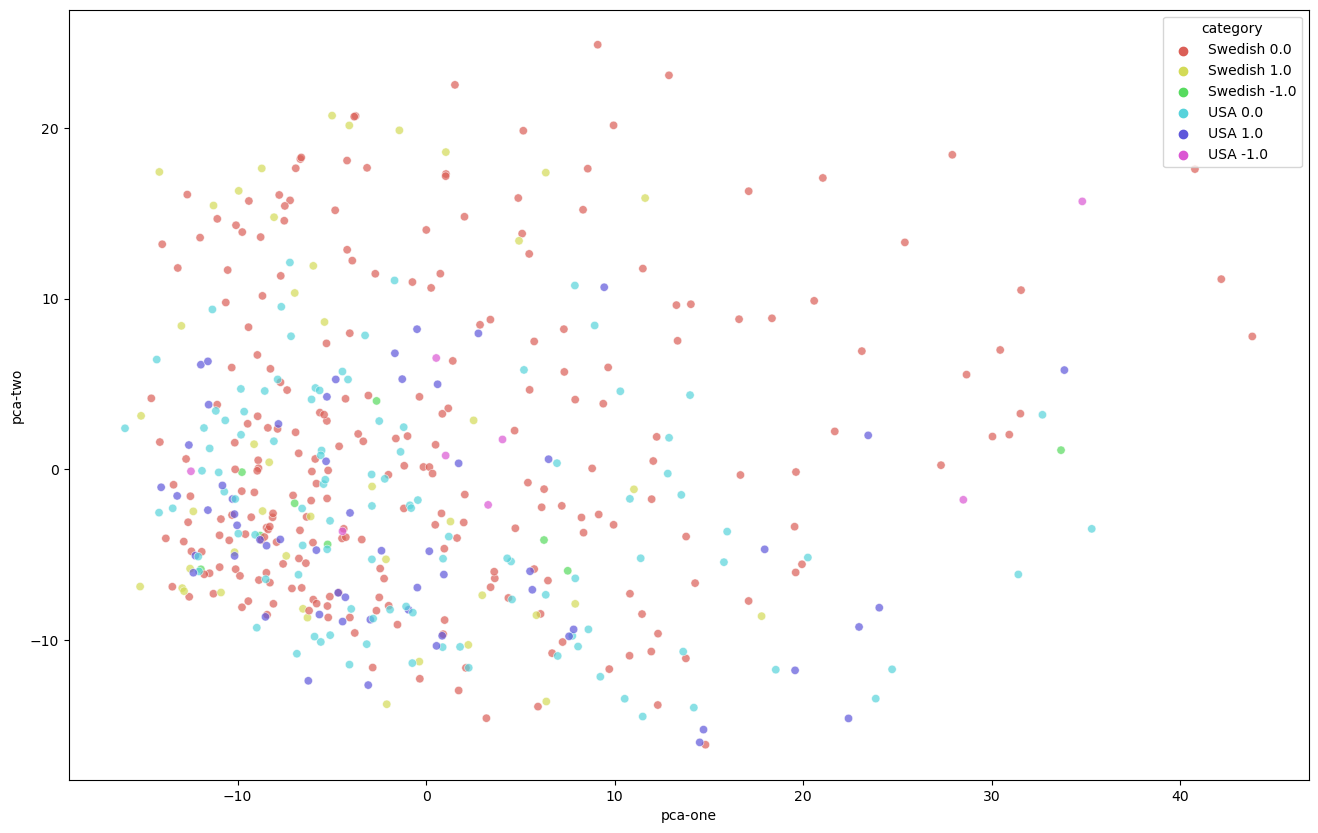

In [99]:
# view PCA

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='category',
    palette=sns.color_palette("hls", 6),
    data=transposed_setlur,
    legend="full",
    alpha=0.7
)

plt.show()

In [100]:
# now is time to t-SNE

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_results = tsne.fit_transform(fit_data)

transposed_setlur['tsne-2d-one'] = tsne_results[:, 0]
transposed_setlur['tsne-2d-two'] = tsne_results[:, 1]

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 472 samples in 0.001s...
[t-SNE] Computed neighbors for 472 samples in 0.257s...
[t-SNE] Computed conditional probabilities for sample 472 / 472
[t-SNE] Mean sigma: 9.487678
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.254742
[t-SNE] KL divergence after 300 iterations: 1.249885


/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/3049159706.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/3049159706.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



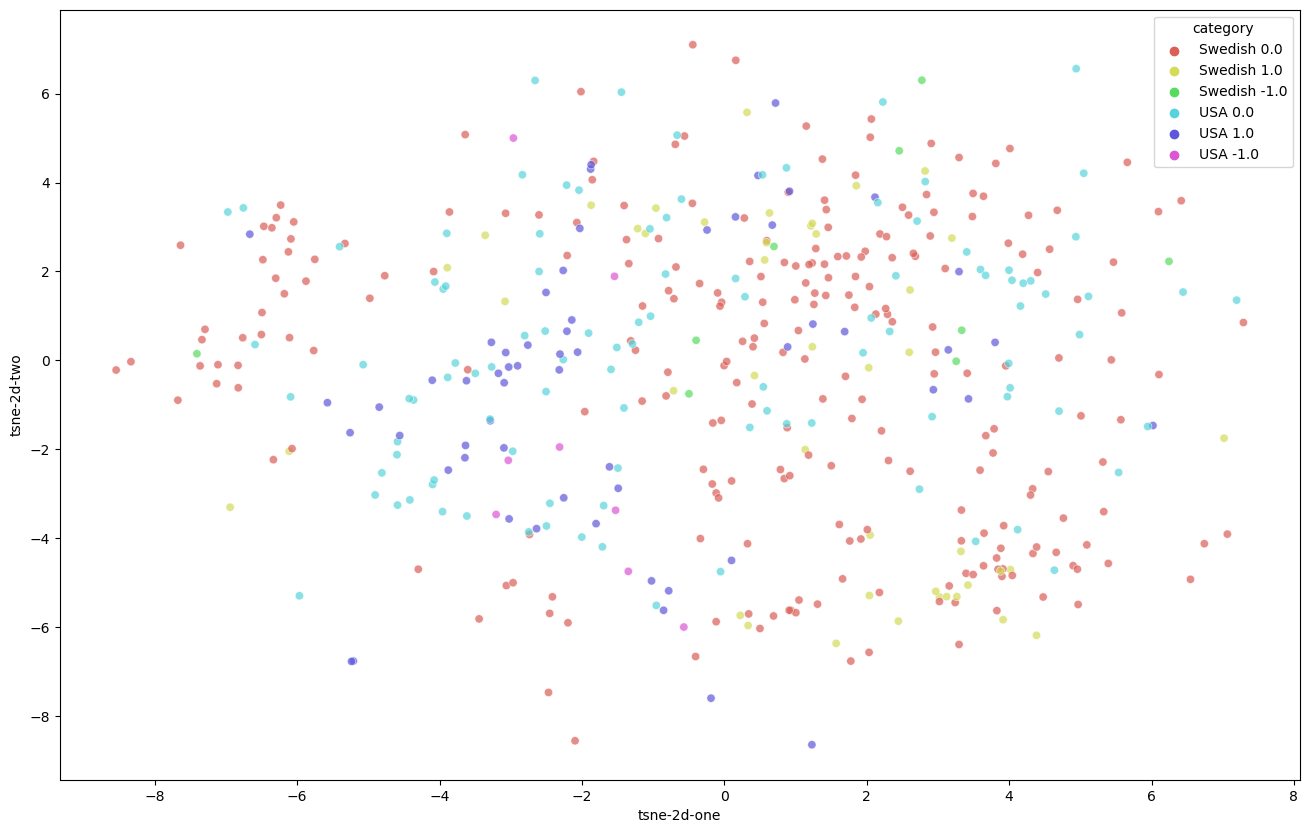

In [101]:
# view t-SNE

plt.figure(figsize=(16, 10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='category',
    palette=sns.color_palette("hls", 6),
    data=transposed_setlur,
    legend="full",
    alpha=0.7
)

plt.show()

/var/folders/gt/xktrgszx29l2zq8y2jzf_twr0000gn/T/ipykernel_2692/252211191.py:26: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



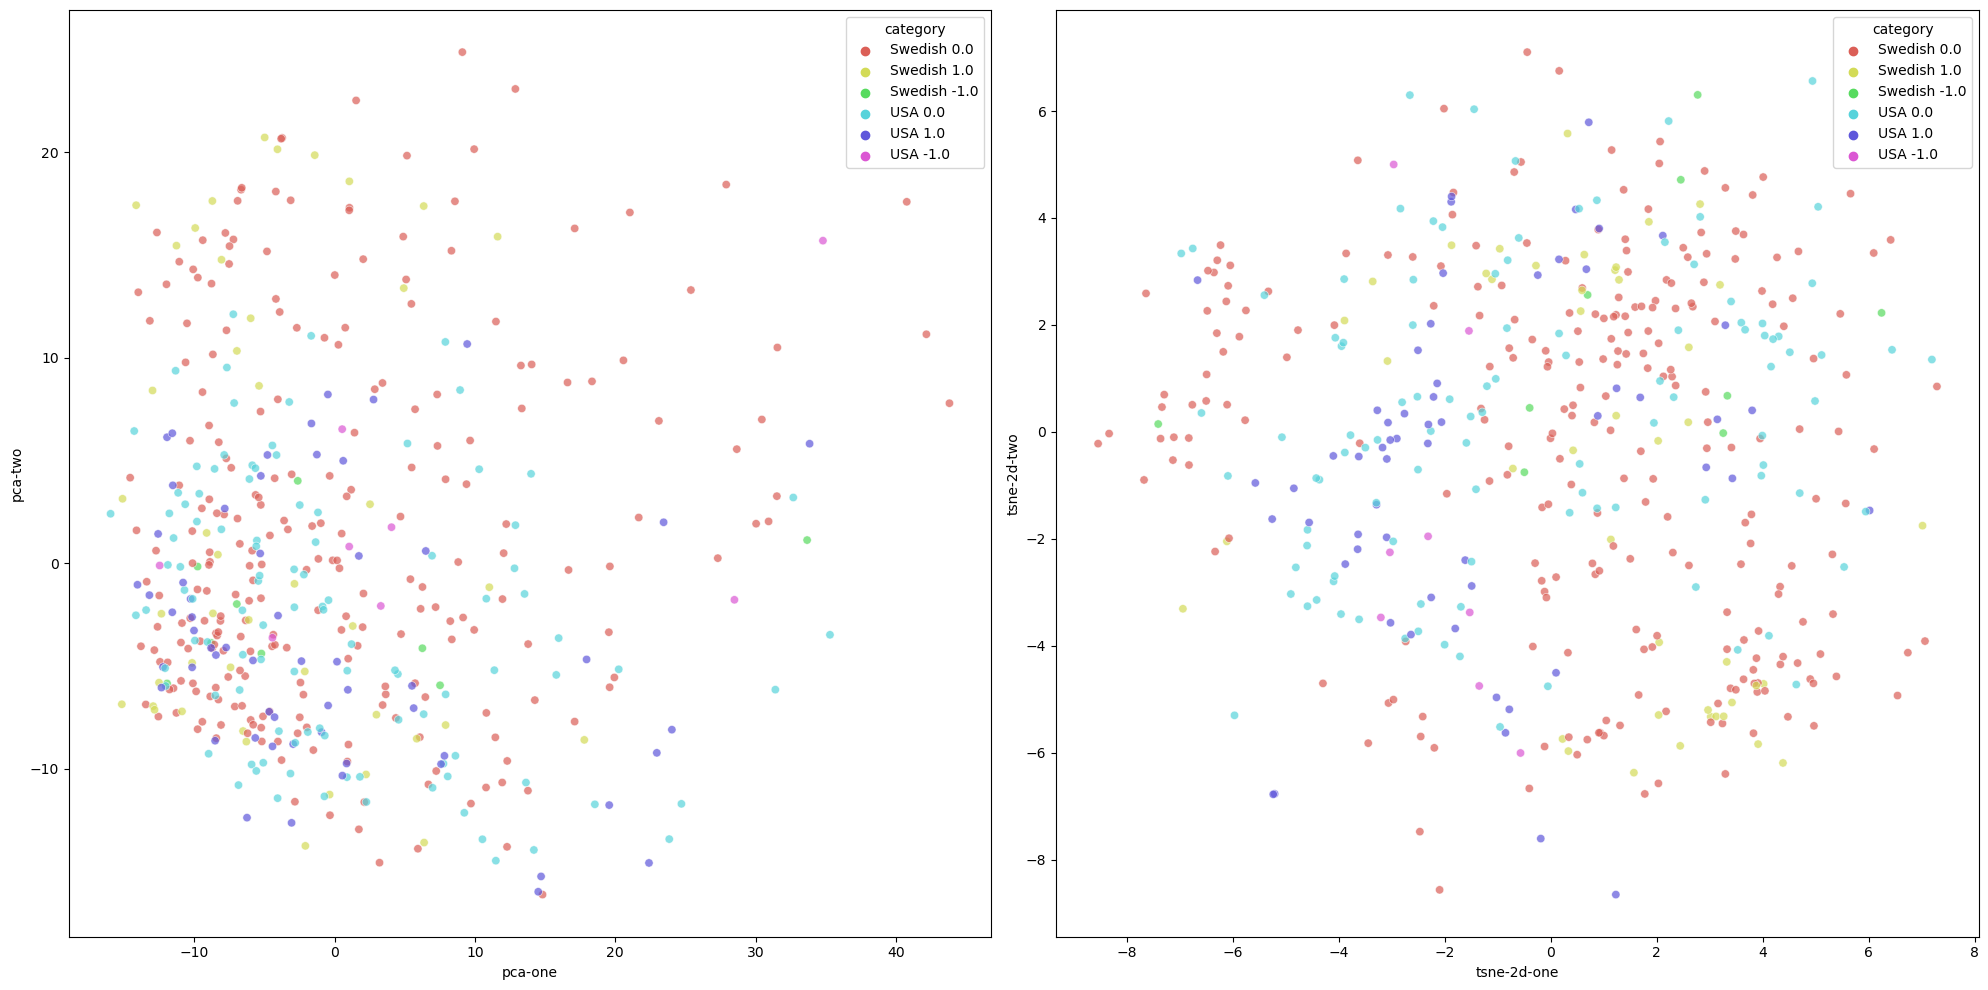

In [102]:
# print back-to-back PCA and t-SNE

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

sns.scatterplot(
    x="pca-one", y="pca-two",
    hue='category',
    palette=sns.color_palette("hls", 6),
    data=transposed_setlur,
    legend="full",
    alpha=0.7,
    ax=ax1
)

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue='category',
    palette=sns.color_palette("hls", 6),
    data=transposed_setlur,
    legend="full",
    alpha=0.7,
    ax=ax2
)

fig.tight_layout()
fig.show()

## Exercise 6
(...)